In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
df = pd.read_csv("../data/labels.csv")

In [3]:
df = df.dropna()
df = df.drop_duplicates()

In [4]:
df.head()

,image,type,subtype
0,100161900.png,Rost,Strassenrost
1,100184900.png,Rost,Strassenrost
2,100034700.png,Rost,Strassenrost
3,100003200.png,Vollguss,Handgriff geschlossen
4,100004000.png,Gussbeton,Pickelloch belueftet


In [5]:
df.shape

(2174, 3)

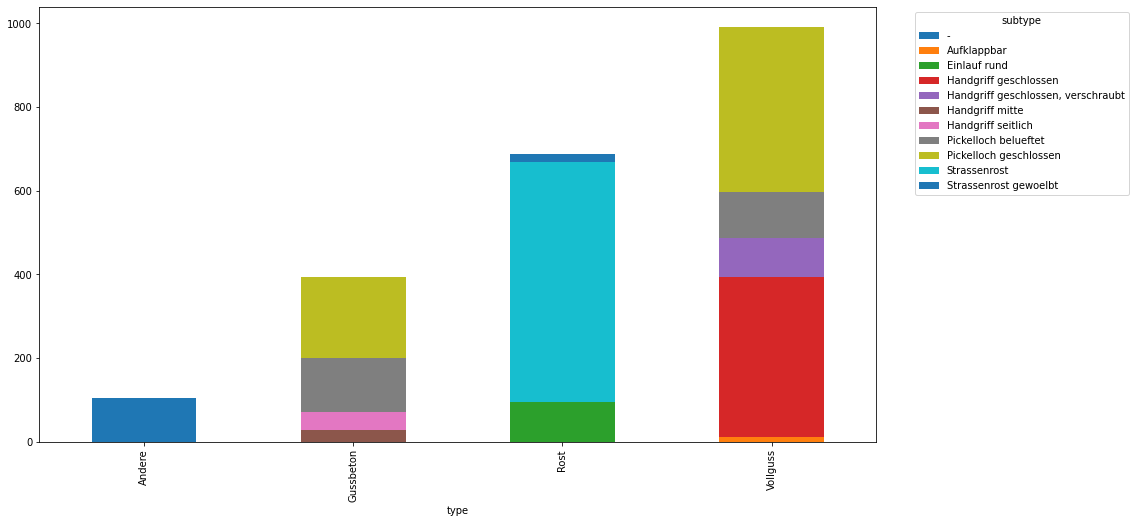

In [6]:
df_plot = df.groupby(['subtype', 'type']).size().reset_index().pivot(columns='subtype', index='type', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",title="subtype")
plt.show()

In [7]:
df['label'] = df['type'] + ' / ' + df['subtype']
df.head()

,image,type,subtype,label
0,100161900.png,Rost,Strassenrost,Rost / Strassenrost
1,100184900.png,Rost,Strassenrost,Rost / Strassenrost
2,100034700.png,Rost,Strassenrost,Rost / Strassenrost
3,100003200.png,Vollguss,Handgriff geschlossen,Vollguss / Handgriff geschlossen
4,100004000.png,Gussbeton,Pickelloch belueftet,Gussbeton / Pickelloch belueftet


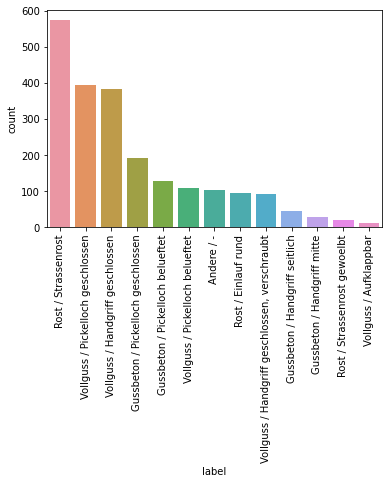

In [12]:
sns.countplot(x="label",data=df,order = df.label.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [13]:
df.loc[df['label'] == "Vollguss / Aufklappbar"]

,image,type,subtype,label
163,100017200.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
197,100129700.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
992,100059700.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1084,100215100.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1307,100065800.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1407,100112700.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1692,100149600.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1921,100144000.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1961,100160800.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar
1962,100215800.png,Vollguss,Aufklappbar,Vollguss / Aufklappbar


In [15]:
df_new = pd.read_csv("../data/transformation_split.csv")

In [21]:
df_new

,image,transforms,label,set,filename
0,100201600.png,orig_pers_flipv,Rost/Strassenrost,train,100201600_orig_pers_flipv.png
1,100201600.png,blur_pers_rot,Rost/Strassenrost,train,100201600_blur_pers_rot.png
2,100023200.png,rot_fliph_orig,Rost/Strassenrost,train,100023200_rot_fliph_orig.png
3,100080900.png,jit_fliph_gray,Rost/Strassenrost,train,100080900_jit_fliph_gray.png
4,100180300.png,gray_jit_flipv,Vollguss/Pickelloch belueftet,train,100180300_gray_jit_flipv.png
...,...,...,...,...,...
10656,100042700.png,0,Vollguss/Pickelloch geschlossen,test,100042700_0.png
10657,100115400.png,0,Gussbeton/Pickelloch geschlossen,test,100115400_0.png
10658,100139100.png,0,Gussbeton/Pickelloch belueftet,test,100139100_0.png
10659,100205600.png,0,Gussbeton/Pickelloch belueftet,test,100205600_0.png


In [25]:
df_new.groupby('transforms').count()

,image,label,set,filename
transforms,,,,
0,538,538,538,538
blur_fliph_flipv,40,40,40,40
blur_fliph_gray,45,45,45,45
blur_fliph_jit,42,42,42,42
blur_fliph_orig,26,26,26,26
...,...,...,...,...
rot_pers_fliph,32,32,32,32
rot_pers_flipv,38,38,38,38
rot_pers_gray,29,29,29,29


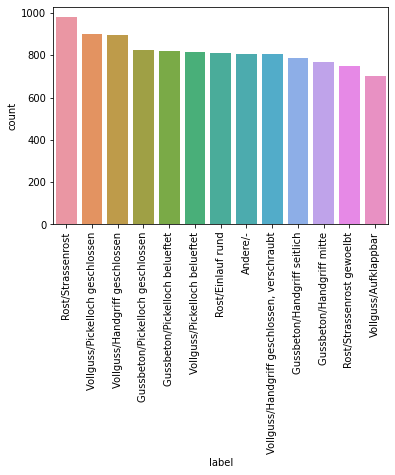

In [19]:
sns.countplot(x="label",data=df_new,order = df_new.label.value_counts().index)
plt.xticks(rotation = 90)
plt.show()